# Universidade Federal do Pará
## Instituto de Ciências Exatas e Naturais
## Faculdade de Computação
## Disciplina: *Inteligência Artificial*
## Professor: *Jefferson Morais*
##Aluna: *Camila Evangelista* - 201911140008

In [2]:
# Imports básicos
import pandas as pd
import numpy as np

In [3]:
# Carregando a base do Google Sheets
url = "https://docs.google.com/spreadsheets/d/1RCKtrtVltDiK9bBgZRgmJoDEwDLXyW_P/export?format=csv&gid=1234134584"
df = pd.read_csv(url)

df.head()
df.shape
df.columns

Index(['idade', 'genero', 'etnia', 'pcd', 'vive_no_brasil', 'estado_moradia',
       'nivel_ensino', 'formacao', 'tempo_experiencia_dados',
       'linguagens_preferidas', 'bancos_de_dados', 'cloud_preferida', 'cargo'],
      dtype='object')

In [4]:
# Seleção de atributos (features) e alvo
# Usaremos os 12 primeiros atributos (idade até cloud_preferida) como entrada
# e o atributo 'cargo' como variável alvo de classificação.

feature_cols = [
    "idade",
    "genero",
    "etnia",
    "pcd",
    "vive_no_brasil",
    "estado_moradia",
    "nivel_ensino",
    "formacao",
    "tempo_experiencia_dados",
    "linguagens_preferidas",
    "bancos_de_dados",      # <- ajustado para o nome correto
    "cloud_preferida",
]

target_col = "cargo"

X = df[feature_cols].copy()
y = df[target_col].copy()

X.head()


,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS)
1,32.0,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS)
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS)


In [5]:
# Tipos e valores faltantes

print("Formato de X (features):", X.shape)
print("Formato de y (alvo):", y.shape)

print("\nTipos de dados das colunas de entrada:")
print(X.dtypes)

print("\nValores faltantes por coluna:")
print(X.isna().sum())

print("\nValores faltantes em 'cargo':", y.isna().sum())


Formato de X (features): (4271, 12)
Formato de y (alvo): (4271,)

Tipos de dados das colunas de entrada:
idade                      float64
genero                      object
etnia                       object
pcd                         object
vive_no_brasil                bool
estado_moradia              object
nivel_ensino                object
formacao                    object
tempo_experiencia_dados     object
linguagens_preferidas       object
bancos_de_dados             object
cloud_preferida             object
dtype: object

Valores faltantes por coluna:
idade                        74
genero                        9
etnia                         0
pcd                           0
vive_no_brasil                0
estado_moradia              115
nivel_ensino                  0
formacao                    122
tempo_experiencia_dados     577
linguagens_preferidas      1292
bancos_de_dados            1293
cloud_preferida            1290
dtype: int64

Valores faltantes em 'cargo': 12

A base tem 4271 instâncias e 12 atributos de entrada.

idade está como float64 (numérica), os demais como categóricos (object ou bool).

Existem muitos NaN em tempo_experiencia_dados, linguagens_preferidas, bancos_de_dados, cloud_preferida e também no alvo cargo (1290 linhas)

In [6]:
# 1) Remover linhas sem 'cargo' (não servem para aprendizado supervisionado)

df_clean = df.dropna(subset=["cargo"]).copy()

print("Formato original:", df.shape)
print("Formato após remover linhas sem 'cargo':", df_clean.shape)

# 2) Selecionar novamente X e y a partir do df_clean

feature_cols = [
    "idade",
    "genero",
    "etnia",
    "pcd",
    "vive_no_brasil",
    "estado_moradia",
    "nivel_ensino",
    "formacao",
    "tempo_experiencia_dados",
    "linguagens_preferidas",
    "bancos_de_dados",
    "cloud_preferida",
]

target_col = "cargo"

X = df_clean[feature_cols].copy()
y = df_clean[target_col].copy()

# 3) Tratar valores faltantes nas features
# Estratégia: para todas as colunas categóricas, criar a categoria "Não informado".
# Para 'idade', podemos preencher com a média (ou mediana).

# a) idade (numérica)
X["idade"] = X["idade"].fillna(X["idade"].median())

# b) demais colunas categóricas
cols_categoricas = [c for c in feature_cols if c != "idade"]

for c in cols_categoricas:
    X[c] = X[c].fillna("Não informado")

# 4) Codificação one-hot das variáveis categóricas
# (transforma categorias em colunas binárias 0/1, compatível com os modelos do scikit-learn)

X_encoded = pd.get_dummies(X, columns=cols_categoricas, drop_first=True)

X_encoded.head()
X_encoded.shape


Formato original: (4271, 13)
Formato após remover linhas sem 'cargo': (2981, 13)


(2981, 1569)

# Seleção e Pré-processamento dos dados

Nesta etapa do processo KDD realizamos primeiro a seleção das instâncias e atributos e, em seguida, o pré‑processamento, preparando o conjunto de dados para ser usado pelos algoritmos de aprendizado de máquina. Optamos por utilizar todas as instâncias que possuem o atributo alvo cargo preenchido e os 12 primeiros atributos (de idade até cloud_preferida) como variáveis de entrada, conforme proposto no enunciado do trabalho. Essa escolha permite aproveitar o máximo de informação disponível sobre o perfil dos respondentes (demografia, formação e preferências técnicas) para prever o cargo na área de dados.

Depois tratamos os valores faltantes nas variáveis de entrada. Para a variável numérica idade, utilizamos a mediana como valor de preenchimento, evitando perder muitas instâncias e mantendo uma medida robusta em relação a possíveis outliers. Para as variáveis categóricas (genero, etnia, pcd, vive_no_brasil, estado_moradia, nivel_ensino, formacao, tempo_experiencia_dados, linguagens_preferidas, bancos_de_dados, cloud_preferida), criamos explicitamente a categoria “Não informado”. Essa decisão segue a recomendação do professor de tratar dados faltantes ou inconsistentes de forma a não comprometer a análise, preservando o máximo de exemplos possível.

Por fim, aplicamos a técnica de one-hot encoding às variáveis categóricas, transformando cada categoria em colunas binárias (0/1). Essa formatação é necessária porque os algoritmos escolhidos na etapa de Mineração de Dados (por exemplo, Regressão Logística, Árvore de Decisão, Random Forest) esperam atributos numéricos como entrada. Usamos a função get_dummies do pandas com drop_first=True para evitar colinearidade perfeita entre as colunas geradas.

/tmp/ipython-input-1078/3676035274.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


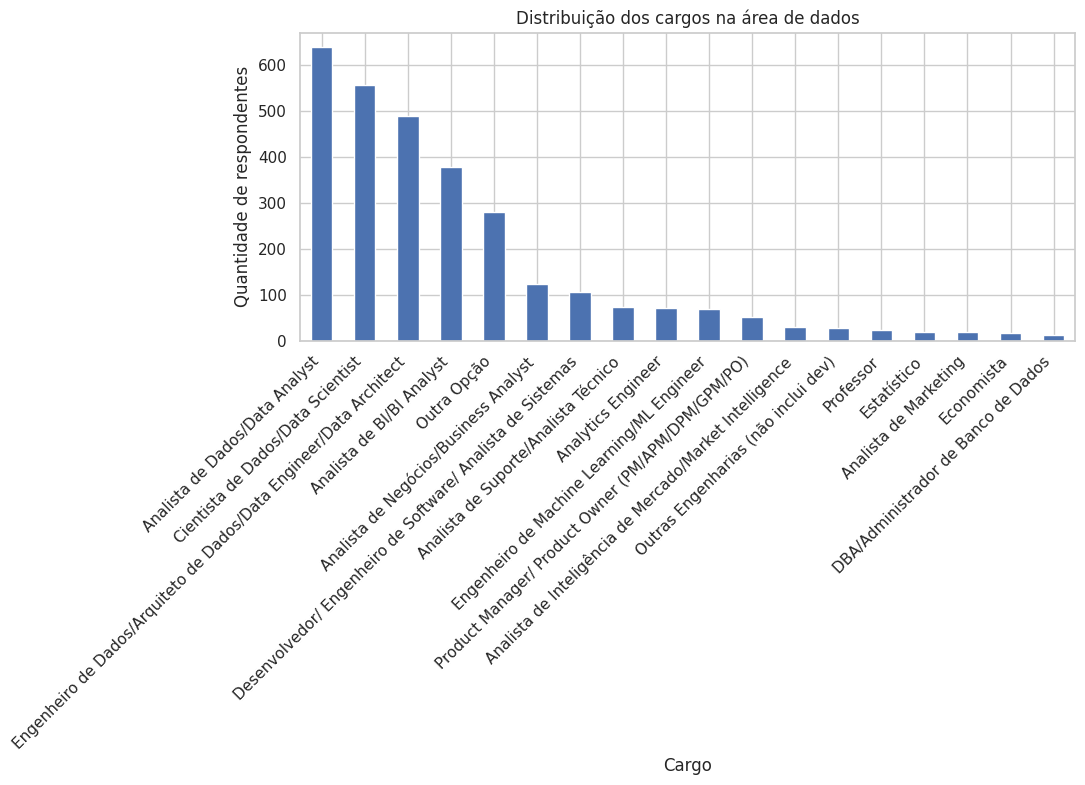

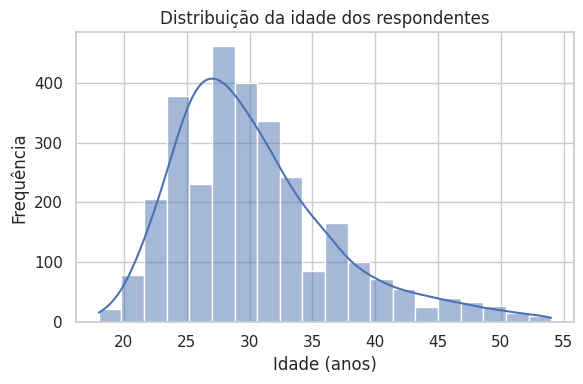

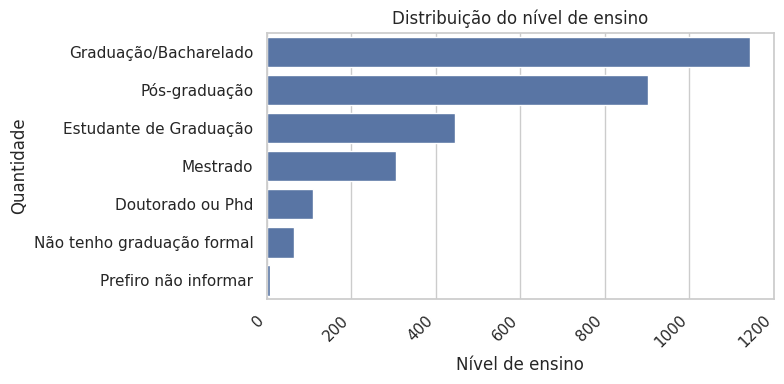

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Distribuição da variável alvo (cargo)
plt.figure(figsize=(10, 4))
y.value_counts().plot(kind="bar")
plt.title("Distribuição dos cargos na área de dados")
plt.xlabel("Cargo")
plt.ylabel("Quantidade de respondentes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 2) Histograma de idade
plt.figure(figsize=(6, 4))
sns.histplot(X["idade"], bins=20, kde=True)
plt.title("Distribuição da idade dos respondentes")
plt.xlabel("Idade (anos)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

# 3) Contagem por nível de ensino
plt.figure(figsize=(8, 4))
sns.countplot(y=X["nivel_ensino"], order=X["nivel_ensino"].value_counts().index)
plt.title("Distribuição do nível de ensino")
plt.xlabel("Nível de ensino")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Análise exploratória dos dados

Como parte da etapa de Seleção do processo KDD, realizamos uma análise exploratória focada em atributos diretamente relacionados à tarefa de classificação do cargo na área de dados. Em primeiro lugar, analisamos a distribuição da variável alvo cargo. O gráfico de barras mostra quais cargos são mais frequentes no conjunto de dados e revela se o problema é balanceado ou se existem classes com muito menos exemplos, o que influencia a escolha das técnicas de mineração de dados e a interpretação da acurácia.

Em seguida, observamos a distribuição da variável numérica idade por meio de um histograma. Esse gráfico ajuda a entender o perfil etário dos respondentes e a identificar possíveis outliers ou faixas etárias pouco representadas, que podem impactar o desempenho dos modelos. Por fim, analisamos a contagem de nivel_ensino, verificando quais níveis de escolaridade são mais comuns entre os profissionais de dados da amostra. Essas visualizações contribuem para compreender melhor os atributos utilizados como entrada no modelo, suas distribuições e possíveis fontes de viés na classificação do cargo.

In [8]:
#Criar atributo derivado de experiência
# Função para mapear faixas de texto em anos de experiência aproximados
def map_experiencia(valor):
    if pd.isna(valor):
        return 0  # já tratamos NaN como "Não informado", mas deixo por segurança
    v = str(valor)
    if "Não tenho experiência" in v:
        return 0
    if "menos de 1 ano" in v:
        return 0.5
    if "1 a 2 anos" in v:
        return 1.5
    if "2 a 3 anos" in v:
        return 2.5
    if "3 a 4 anos" in v:
        return 3.5
    if "4 a 5 anos" in v:
        return 4.5
    if "5 a 10 anos" in v:
        return 7.5
    if "mais de 10 anos" in v:
        return 12
    if "Não informado" in v:
        return -1  # código especial para "não informado"
    return -1

# Aplicar o mapeamento (na base antes do one-hot ou em df_clean, como preferir)
df_clean["experiencia_anos"] = df_clean["tempo_experiencia_dados"].apply(map_experiencia)

# Atualizar lista de features: acrescentar a nova coluna numérica
feature_cols_extended = feature_cols + ["experiencia_anos"]

X = df_clean[feature_cols_extended].copy()
y = df_clean[target_col].copy()

# Repetir o preenchimento de idade e categóricas + one-hot, agora incluindo experiencia_anos
X["idade"] = X["idade"].fillna(X["idade"].median())
X["experiencia_anos"] = X["experiencia_anos"].fillna(-1)

cols_categoricas = [c for c in feature_cols_extended if c not in ["idade", "experiencia_anos"]]

for c in cols_categoricas:
    X[c] = X[c].fillna("Não informado")

X_encoded = pd.get_dummies(X, columns=cols_categoricas, drop_first=True)

X_encoded.head()


,idade,experiencia_anos,genero_Masculino,genero_Não informado,genero_Prefiro não informar,etnia_Branca,etnia_Indígena,etnia_Outra,etnia_Parda,etnia_Prefiro não informar,...,bancos_de_dados_none,bancos_de_dados_nosso banco é no excel,bancos_de_dados_não sei,bancos_de_dados_não uso nenhum,bancos_de_dados_não utilizamos banco de dados,bancos_de_dados_sintax,cloud_preferida_Azure (Microsoft),cloud_preferida_Google Cloud (GCP),cloud_preferida_Não sei opinar,cloud_preferida_Outra Cloud
0,39.0,1.5,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,53.0,3.5,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,27.0,-1.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,46.0,0.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,32.0,0.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


# Criação de atributo derivado de experiência

Atendendo à recomendação do enunciado de criar novos atributos a partir dos já existentes, derivamos uma variável numérica experiencia_anos a partir do atributo categórico tempo_experiencia_dados. As faixas textuais de experiência (“Não tenho experiência na área de dados”, “1 a 2 anos”, “5 a 10 anos”, “mais de 10 anos” etc.) foram mapeadas para valores numéricos aproximados (0, 1.5, 7.5, 12, entre outros). Essa transformação torna a informação de experiência mais adequada para algoritmos que trabalham melhor com variáveis contínuas ou ordinais, além de permitir interpretar diretamente o efeito dos anos de experiência na previsão do cargo.

Para lidar com ruídos e ausências nos dados, adotamos duas estratégias simples e transparentes. Para a variável numérica idade, utilizamos a mediana como valor de preenchimento, reduzindo o impacto de possíveis outliers e evitando descartar muitas instâncias. Já nas variáveis categóricas, optamos por criar explicitamente a categoria “Não informado”, em vez de remover registros ou tentar adivinhar valores. Essa escolha permite manter o máximo de respondentes na base, ao mesmo tempo em que sinaliza para os modelos que aquela informação está ausente, o que está alinhado com a orientação do trabalho de tratar dados faltantes e inconsistentes sem comprometer a análise.


# Formatação

In [9]:
#Hold‑out estratificado 70% treino/30% teste
from sklearn.model_selection import train_test_split

# X_encoded e y já devem estar prontos a partir dos blocos anteriores

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.30,          # 30% para teste
    stratify=y,              # mantém a proporção de classes nos dois conjuntos
    random_state=42          # semente para reprodutibilidade
)

print("Tamanho do conjunto de treinamento:", X_train.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])
print("Proporção de classes no conjunto original:")
print(y.value_counts(normalize=True).round(3))

print("\nProporção de classes no conjunto de treinamento:")
print(y_train.value_counts(normalize=True).round(3))

print("\nProporção de classes no conjunto de teste:")
print(y_test.value_counts(normalize=True).round(3))



Tamanho do conjunto de treinamento: 2086
Tamanho do conjunto de teste: 895
Proporção de classes no conjunto original:
cargo
Analista de Dados/Data Analyst                                         0.214
Cientista de Dados/Data Scientist                                      0.187
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    0.164
Analista de BI/BI Analyst                                              0.127
Outra Opção                                                            0.094
Analista de Negócios/Business Analyst                                  0.041
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas            0.036
Analista de Suporte/Analista Técnico                                   0.024
Analytics Engineer                                                     0.023
Engenheiro de Machine Learning/ML Engineer                             0.023
Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)                     0.017
Analista de Inteligência de M

# Divisão hold-out estratificada (70%/30%)

Para atender à etapa de Formatação/Teste e Validação, aplicamos a técnica de hold-out estratificado, dividindo o conjunto de dados em 70% para treinamento e 30% para teste. Utilizamos a função train_test_split do scikit-learn com o parâmetro stratify=y, garantindo que a proporção de cada cargo seja aproximadamente a mesma nos dois subconjuntos. Essa estratégia é importante porque a variável alvo é desbalanceada: algumas classes possuem muito mais exemplos do que outras. Ao manter a distribuição original de classes em treino e teste, reduzimos o risco de avaliações enviesadas da acurácia dos modelos.

# Mineração de Dados
Escolha dos algoritmos de classificação

Para a etapa de Mineração de Dados, selecionamos dois algoritmos supervisionados da biblioteca scikit‑learn: Regressão Logística e Floresta Aleatória (Random Forest). A Regressão Logística é um modelo linear amplamente utilizado em problemas de classificação multiclasse, especialmente quando os atributos de entrada são codificados em formato one‑hot, como neste trabalho. Ela oferece treinamento rápido, boa interpretabilidade dos coeficientes e costuma servir como um baseline forte para comparar outros modelos.

A Floresta Aleatória, por outro lado, é um método de ensemble baseado em múltiplas árvores de decisão treinadas com amostras e subconjuntos de atributos diferentes. Esse algoritmo é capaz de capturar relações não lineares entre as variáveis, lida bem com atributos categóricos convertidos em dummies e tende a ser mais robusto a ruídos e à presença de classes desbalanceadas. Ao comparar esses dois modelos, conseguimos avaliar o desempenho de um classificador linear versus um modelo mais complexo baseado em árvores, identificando qual abordagem é mais adequada para prever o cargo na área de dados a partir do perfil dos respondentes.

In [10]:
#Definir modelos e hiperparâmetros
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelo 1 – Regressão Logística
log_reg = LogisticRegression(
    multi_class="multinomial",  # adequado para várias classes
    solver="lbfgs",             # solver estável para problemas médios
    max_iter=1000,              # aumenta iterações para garantir convergência
    n_jobs=-1                   # usa todos os núcleos disponíveis
)

# Modelo 2 – Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=200,      # número de árvores (equilíbrio entre desempenho e tempo)
    max_depth=None,        # árvores crescem até onde os dados pedirem
    min_samples_split=2,   # padrão, permitindo árvores detalhadas
    min_samples_leaf=1,    # folhas com pelo menos 1 amostra
    random_state=42,       # reprodutibilidade
    n_jobs=-1              # paralelismo
)


# Escolha dos hiperparâmetros

Na Regressão Logística, configuramos multi_class="multinomial" e solver="lbfgs", pois estamos lidando com um problema de classificação multiclasse e o scikit-learn recomenda esse par de opções para esse cenário. O solver L-BFGS é adequado para bases de tamanho médio e lida bem com o grande número de atributos gerados pelo one-hot encoding. Além disso, aumentamos max_iter para 1000 iterações, garantindo a convergência do otimizador mesmo com muitas features, e utilizamos n_jobs=-1 para aproveitar todos os núcleos de processamento disponíveis, reduzindo o tempo de treino.

Para a Floresta Aleatória, escolhemos n_estimators=200, o que fornece um conjunto de árvores suficientemente grande para estabilizar as estimativas de probabilidade e reduzir a variância, sem tornar o tempo de treinamento proibitivo. Mantivemos max_depth=None, permitindo que cada árvore cresça até onde os dados forem informativos, já que os atributos já passaram por pré-processamento e não há risco de overfitting extremo ser avaliado sem controle (a validação por hold-out vai indicar isso). Os parâmetros min_samples_split=2 e min_samples_leaf=1 seguem os valores padrão, garantindo que o modelo consiga capturar padrões mais finos entre os cargos. Por fim, definimos random_state=42 para garantir reprodutibilidade e n_jobs=-1 para treinar a floresta em paralelo, tornando o processo computacionalmente mais eficiente.

In [11]:
#Treinar os dois modelos

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelo 1 – Regressão Logística
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    n_jobs=-1
)

# Modelo 2 – Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Treinamento
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

# Treinamento dos modelos

Após o pré‑processamento, a formatação dos dados e a divisão hold‑out estratificada, treinamos os dois modelos escolhidos (Regressão Logística e Floresta Aleatória) utilizando apenas o conjunto de treinamento. Essa etapa corresponde à fase de Mineração de Dados do processo KDD, na qual os algoritmos aprendem padrões que relacionam o perfil dos respondentes (features) ao cargo ocupado (variável alvo).

In [12]:
#Predições, matrizes de confusão e acurácia

from sklearn.metrics import confusion_matrix, accuracy_score

# Predições em treino e teste
y_train_pred_log = log_reg.predict(X_train)
y_test_pred_log  = log_reg.predict(X_test)

y_train_pred_rf = rf_clf.predict(X_train)
y_test_pred_rf  = rf_clf.predict(X_test)

# Matrizes de confusão
cm_train_log = confusion_matrix(y_train, y_train_pred_log, labels=y.unique())
cm_test_log  = confusion_matrix(y_test,  y_test_pred_log,  labels=y.unique())

cm_train_rf = confusion_matrix(y_train, y_train_pred_rf, labels=y.unique())
cm_test_rf  = confusion_matrix(y_test,  y_test_pred_rf,  labels=y.unique())

# Acurácia geral
acc_train_log = accuracy_score(y_train, y_train_pred_log)
acc_test_log  = accuracy_score(y_test,  y_test_pred_log)

acc_train_rf = accuracy_score(y_train, y_train_pred_rf)
acc_test_rf  = accuracy_score(y_test,  y_test_pred_rf)

print("Regressão Logística - acurácia treino:", acc_train_log)
print("Regressão Logística - acurácia teste :", acc_test_log)
print("\nRandom Forest       - acurácia treino:", acc_train_rf)
print("Random Forest       - acurácia teste :", acc_test_rf)


Regressão Logística - acurácia treino: 0.5963566634707574
Regressão Logística - acurácia teste : 0.358659217877095

Random Forest       - acurácia treino: 0.9990412272291467
Random Forest       - acurácia teste : 0.31731843575418994


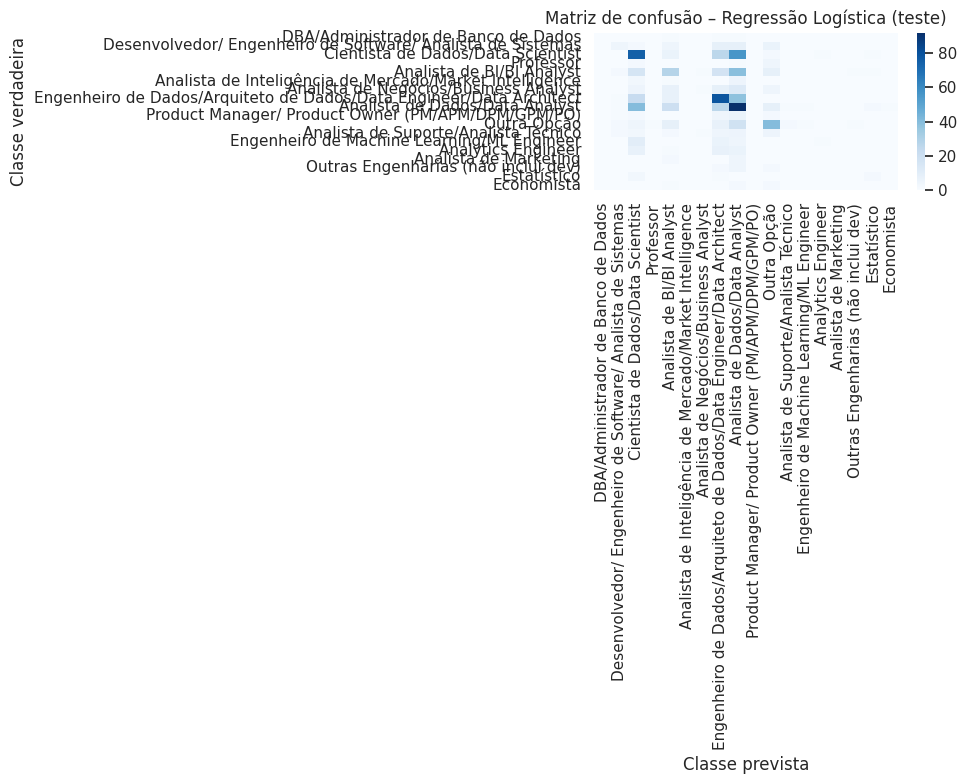

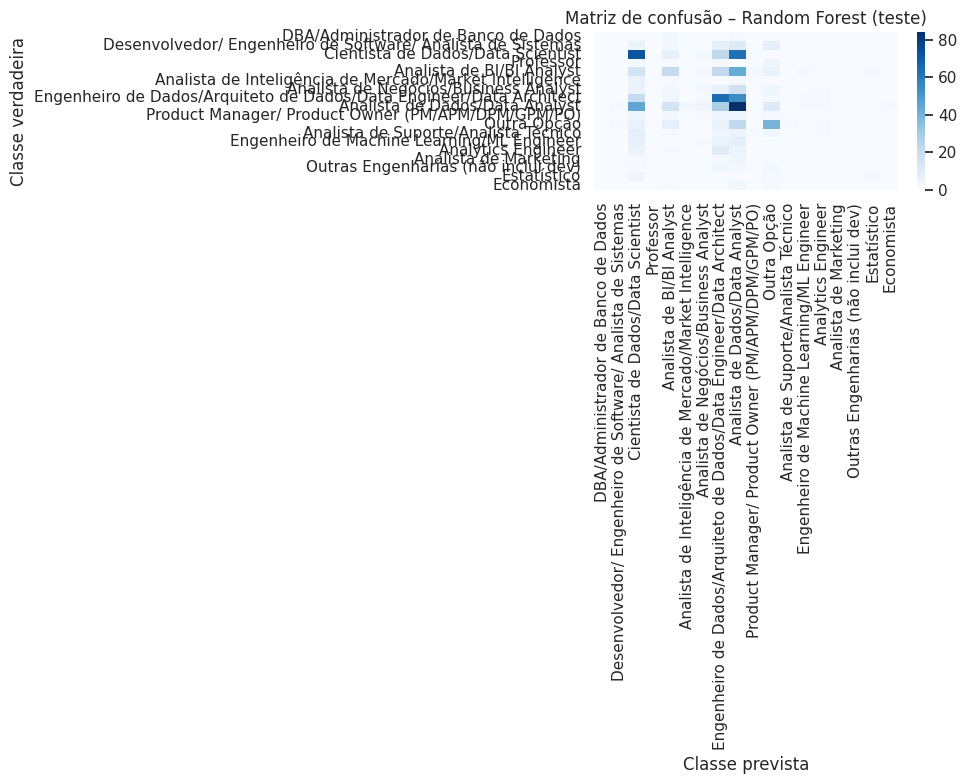

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Visualizar as Matrizes de Confusão
labels = y.unique()

def plot_cm(cm, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        pd.DataFrame(cm, index=labels, columns=labels),
        annot=False, cmap="Blues"
    )
    plt.xlabel("Classe prevista")
    plt.ylabel("Classe verdadeira")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_cm(cm_test_log, "Matriz de confusão – Regressão Logística (teste)")
plot_cm(cm_test_rf,  "Matriz de confusão – Random Forest (teste)")


#Matrizes de confusão e acurácia geral

Para avaliar os modelos, calculamos as matrizes de confusão e a acurácia geral em treino e teste. A matriz de confusão mostra, para cada cargo verdadeiro, quantos exemplos foram corretamente classificados e quantos foram confundidos com outros cargos. Essa visualização é importante porque o problema é multiclasse e desbalanceado: olhar apenas a acurácia poderia esconder classes com desempenho muito ruim.

A acurácia geral em treino (accuracy_score(y_train, y_train_pred)) indica o quanto cada modelo consegue se ajustar aos dados de treinamento, enquanto a acurácia em teste mostra o desempenho em exemplos nunca vistos. Comparando os valores de acurácia de Regressão Logística e Random Forest em teste, conseguimos identificar qual algoritmo generaliza melhor para novos candidatos, atendendo à etapa de Avaliação solicitada no enunciado.

In [14]:
#Comparação de Acurácia

import pandas as pd

dados_acc = {
    "Modelo": ["Regressão Logística", "Random Forest"],
    "Acurácia treino": [acc_train_log, acc_train_rf],
    "Acurácia teste":  [acc_test_log,  acc_test_rf],
}

df_acc = pd.DataFrame(dados_acc)
df_acc


,Modelo,Acurácia treino,Acurácia teste
0,Regressão Logística,0.596357,0.358659
1,Random Forest,0.999041,0.317318


#Comparação dos modelos e análise da acurácia

A Tabela de comparação mostra que a Regressão Logística obteve acurácia de aproximadamente 59,6% no conjunto de treinamento e 35,9% no conjunto de teste. Já a Random Forest atingiu cerca de 99,9% de acurácia em treinamento, mas apenas 31,7% em teste. Esses resultados indicam que a Random Forest se ajusta quase perfeitamente aos dados de treinamento, porém perde desempenho ao generalizar para exemplos novos, enquanto a Regressão Logística mantém um equilíbrio maior entre treino e teste.

A diferença extremamente alta entre acurácia de treino e teste na Random Forest sugere forte overfitting: o modelo memoriza detalhes específicos do conjunto de treinamento, inclusive ruídos, mas não consegue reproduzir esse desempenho no conjunto de teste. Na Regressão Logística, a queda de desempenho entre treino e teste é menor, o que indica um modelo mais simples, porém mais estável em termos de generalização. As matrizes de confusão reforçam esse comportamento: em ambos os modelos os cargos mais frequentes são melhor classificados, mas a Random Forest não consegue converter seu ajuste quase perfeito em treino em melhorias reais nas classes raras do teste.

Considerando a acurácia em teste como principal métrica de desempenho, o modelo que apresentou melhor resultado global foi a Regressão Logística, com 35,9% de acerto contra 31,7% da Random Forest. Além disso, a menor diferença entre treino e teste indica menor risco de overfitting e maior capacidade de generalização para novos candidatos. Dessa forma, a Regressão Logística se mostra a técnica mais adequada para classificar o conjunto de dados deste trabalho, de acordo com as evidências quantitativas (acurácia) e qualitativas (padrões observados nas matrizes de confusão)